In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
from scipy import stats
from myst_nb import glue
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# HIDDEN

# X = number of heads in first two tosses; Y = number of heads in first five tosses
def joint_probability(x, y):
    if y >= x:
        return stats.binom.pmf(x, 2, 1/2) * stats.binom.pmf(y-x, 3, 1/2)
    else:
        return 0
    
k_x = np.arange(3)
k_y = np.arange(6)

joint_table = Table().values('X', k_x, 'Y', k_y).probability_function(joint_probability)

## Marginal Distributions ##

What does the joint distribution of $X$ and $Y$ tell us about the distribution of $X$ alone?

Everything, of course. Let's see how.

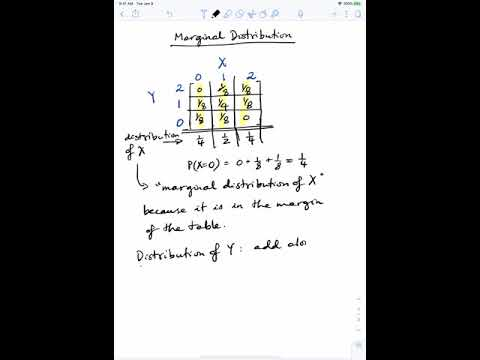

In [3]:
# VIDEO: Marginal Distribution
from IPython.display import YouTubeVideo

vid_marginal_dist = YouTubeVideo("E-m1o0bxFzo")
glue("vid_marginal_dist", vid_marginal_dist)

```{dropdown} See More
:icon: video
{glue:}`vid_marginal_dist`
```

Here is the joint distribution table of two random variables $X$ and $Y$.

In [4]:
joint_table

,X=0,X=1,X=2
Y=5,0.00000,0.0000,0.03125
Y=4,0.00000,0.0625,0.09375
Y=3,0.03125,0.1875,0.09375
Y=2,0.09375,0.1875,0.03125
Y=1,0.09375,0.0625,0.00000
Y=0,0.03125,0.0000,0.00000


To find the distribution of $X$ we need the possible values of $X$ and all their probabilities.

At a glance, you can see that the possible values of $X$ are 0, 1, and 2.

Let's look at the event $\{ X = 0 \}$. 

In [5]:
def indicator_X_equals_0(i, j):
    return i == 0

joint_table.event(indicator_X_equals_0, 'X', 'Y')

P(Event) = 0.25000000000000017


,X=0,X=1,X=2
Y=5,0.00000,,
Y=4,0.00000,,
Y=3,0.03125,,
Y=2,0.09375,,
Y=1,0.09375,,
Y=0,0.03125,,


These are the cells in the column labeled `X=0`. The sum of the probabilities in those cells is $P(X = 0) = 0.25$.

### Partitioning $\{X = x \}$ According to $Y$ ###
In every cell of the column labeled `X=0`, the value of $X$ is 0 and the value of $Y$ is some possible value of $Y$. So the column `X=0` partitions the event $\{X = 0\}$ according to the value of $Y$, and displays the probability of each piece of the partition.

In other words, for every $x$ we have
$$
\{X = x \} = \bigcup_{\text{all } y} \{X = x, Y = y\}
$$
and this is a disjoint union. So by the addition rule,

$$
P(X = x) = \sum_{\text{all } y} P(X = x, Y = y)
$$

That is, $P(X = x)$ is the sum of the probabilities in the column `X=x`. Because $P(X = x)$ is the generic term in the distribution of $X$, we have learned that we can derive the distribution of $X$ from the joint distribution of $X$ and $Y$.

```{admonition} Quick Check
In the numerical example above, consider the probabilities $P(X=2, Y=y)$ for $0 \le y \le 5$. 

(a) How many of those probabilities are positive?

(b) Fill in the blank with an event: The sum of the positive probabilities in Part (a) equals $P( \underline{~~~~~~~~~~~~~~~~~~~} )$.

```

```{admonition} Answer
:class: dropdown
(a) 4 $~~~~$ (b) $X=2$

```

### Marginal Distribution of $X$ ###

To find the numerical values of the distribution of $X$, we will use a method called `marginal` that operates on a joint distribution object and takes the variable name as its argument. The reason for using the word "marginal" will become clear as soon as we see the output.

In [6]:
joint_table.marginal('X')

,X=0,X=1,X=2
Y=5,0.00000,0.0000,0.03125
Y=4,0.00000,0.0625,0.09375
Y=3,0.03125,0.1875,0.09375
Y=2,0.09375,0.1875,0.03125
Y=1,0.09375,0.0625,0.00000
Y=0,0.03125,0.0000,0.00000
Sum: Marginal of X,0.25000,0.5000,0.25000


Now at the bottom of the table you have all the column sums, which constitute the probabilities in the distribution of $X$. 

Because the sums appear in the margin of the table, the distribution is called *marginal*. It's a bit silly. But "marginal" is a commonly used term for the probability distribution of $X$ when the distribution has been derived from a joint distribution.

You should recognize that $X$ has the same distribution as the number of heads in two tosses of a coin.

### Both Marginals ###
What you can do for $X$, you can do as well for $Y$ by looking along the rows.

In [7]:
joint_table.marginal('Y')

,X=0,X=1,X=2,Sum: Marginal of Y
Y=5,0.00000,0.0000,0.03125,0.03125
Y=4,0.00000,0.0625,0.09375,0.15625
Y=3,0.03125,0.1875,0.09375,0.31250
Y=2,0.09375,0.1875,0.03125,0.31250
Y=1,0.09375,0.0625,0.00000,0.15625
Y=0,0.03125,0.0000,0.00000,0.03125


You can also get both marginals at once:

In [8]:
joint_table.both_marginals()

,X=0,X=1,X=2,Sum: Marginal of Y
Y=5,0.00000,0.0000,0.03125,0.03125
Y=4,0.00000,0.0625,0.09375,0.15625
Y=3,0.03125,0.1875,0.09375,0.31250
Y=2,0.09375,0.1875,0.03125,0.31250
Y=1,0.09375,0.0625,0.00000,0.15625
Y=0,0.03125,0.0000,0.00000,0.03125
Sum: Marginal of X,0.25000,0.5000,0.25000,1.00000


The bottom right corner cell is the sum of all the probabilities in the table, and also the sum of all the probabilities in each of the margins. Reassuringly, it's 1.